In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from collections import defaultdict
from matplotlib import pyplot as plt
import pickle
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from itertools import combinations
import dask.dataframe as dd

In [2]:
reqd_cols = ['Vehicle Expiration Date',
             'Violation Precinct',
             'Issuer Precinct',
             'Vehicle Year']

In [3]:
clean_data_16 = pd.read_hdf("./clean_data_16.h5")

In [4]:
clean_data_16

,Vehicle Expiration Date,Violation Precinct,Issuer Precinct,Vehicle Year
0,153,74.0,301.0,2010.0
1,119,79.0,301.0,0.0
2,0.0,79.0,0.0,0.0
3,0.0,79.0,301.0,2015.0
4,37,79.0,301.0,2006.0
...,...,...,...,...
10626894,333,43.0,43.0,2013.0
10626895,454,43.0,43.0,0.0
10626896,454,43.0,43.0,2007.0
10626897,151,43.0,43.0,2015.0


In [6]:
for col in clean_data_16:
    print("clean_data_16[%s].isnull().values.any()"%col,clean_data_16[col].isnull().values.any())

clean_data_16[Vehicle Expiration Date].isnull().values.any() False
clean_data_16[Violation Precinct].isnull().values.any() True
clean_data_16[Issuer Precinct].isnull().values.any() True
clean_data_16[Vehicle Year].isnull().values.any() True


### Finding number of null values in each column

In [7]:
clean_data_16.isnull().sum()

Vehicle Expiration Date    0
Violation Precinct         1
Issuer Precinct            1
Vehicle Year               1
dtype: int64

### Dropping null values

In [8]:
clean_data_16 = clean_data_16.dropna()

In [9]:
clean_data_16.isnull().sum()

Vehicle Expiration Date    0
Violation Precinct         0
Issuer Precinct            0
Vehicle Year               0
dtype: int64

# Type casting columns

In [29]:
clean_data_16.dtypes

Vehicle Expiration Date      int64
Violation Precinct         float64
Issuer Precinct            float64
Vehicle Year               float64
dtype: object

In [10]:
def convInt(val):
    try:
        return int(val)
    except:
        return int(float(val))

In [11]:
clean_data_16['Vehicle Expiration Date'] = clean_data_16['Vehicle Expiration Date'].apply(convInt)

<ipython-input-11-420f9fff81af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data_16['Vehicle Expiration Date'] = clean_data_16['Vehicle Expiration Date'].apply(convInt)


In [12]:
convert_dict = {'Vehicle Expiration Date': int, 
                'Violation Precinct': int,
                'Issuer Precinct' : int,
                'Vehicle Year' : int
               }
clean_data_16 = clean_data_16.astype(convert_dict) 

In [13]:
clean_data_16.dtypes

Vehicle Expiration Date    int64
Violation Precinct         int64
Issuer Precinct            int64
Vehicle Year               int64
dtype: object

In [32]:
clean_data_16

,Vehicle Expiration Date,Violation Precinct,Issuer Precinct,Vehicle Year
0,153,74,301,2010
1,119,79,301,0
2,0,79,0,0
3,0,79,301,2015
4,37,79,301,2006
...,...,...,...,...
10626894,333,43,43,2013
10626895,454,43,43,0
10626896,454,43,43,2007
10626897,151,43,43,2015


# Visualizing raw data

In [33]:
def visualize_cols(df):
    # combination of numbers i.e. 4C2 to see how each column varies w.r.t to the other
    comb_list = list(combinations([0,1,2,3],2))
    
    for comb in comb_list:
        print(reqd_cols[comb[0]])
        print(reqd_cols[comb[1]])
        
        plt.figure(figsize=(12,9))

        plt.scatter(df.iloc[:,comb[0]],df.iloc[:,comb[1]])
        plt.xlabel(reqd_cols[comb[0]])
        plt.ylabel(reqd_cols[comb[1]])

Vehicle Expiration Date
Violation Precinct
Vehicle Expiration Date
Issuer Precinct
Vehicle Expiration Date
Vehicle Year
Violation Precinct
Issuer Precinct
Violation Precinct
Vehicle Year
Issuer Precinct
Vehicle Year


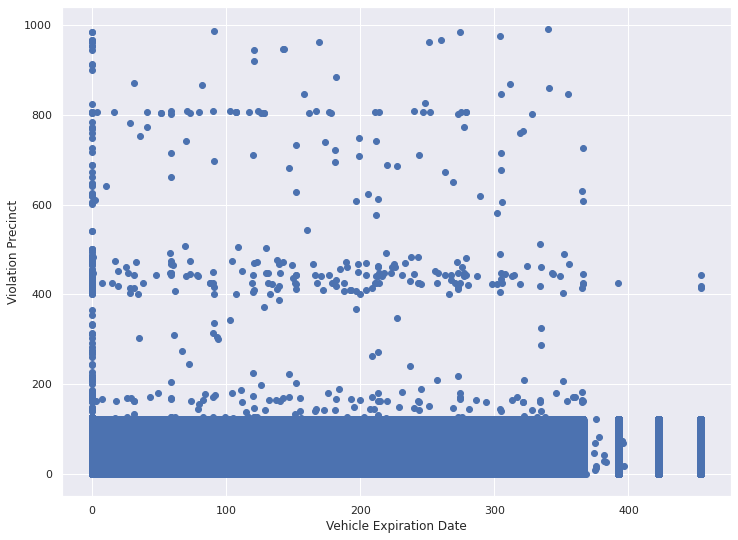

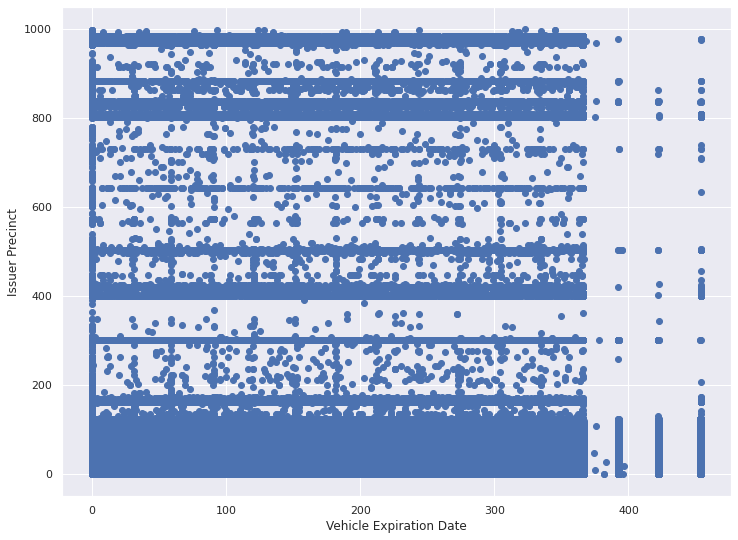

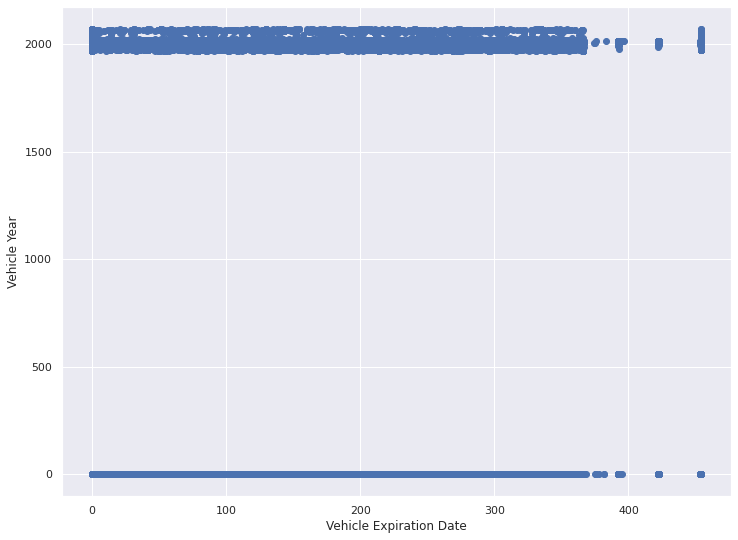

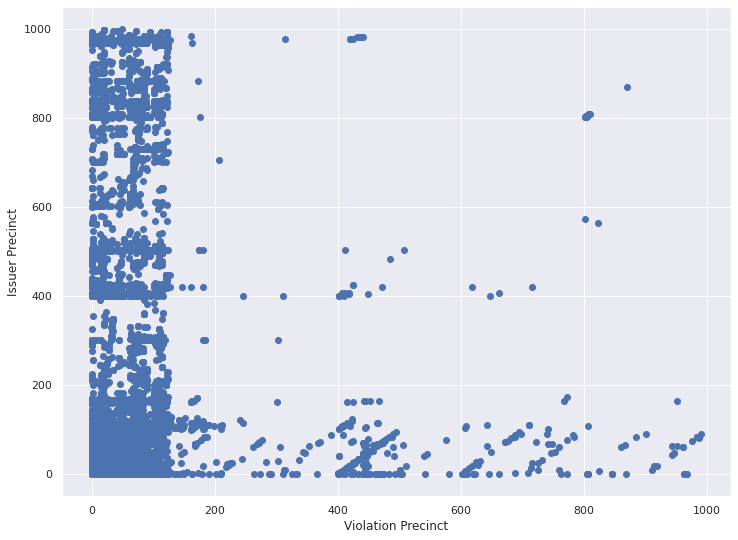

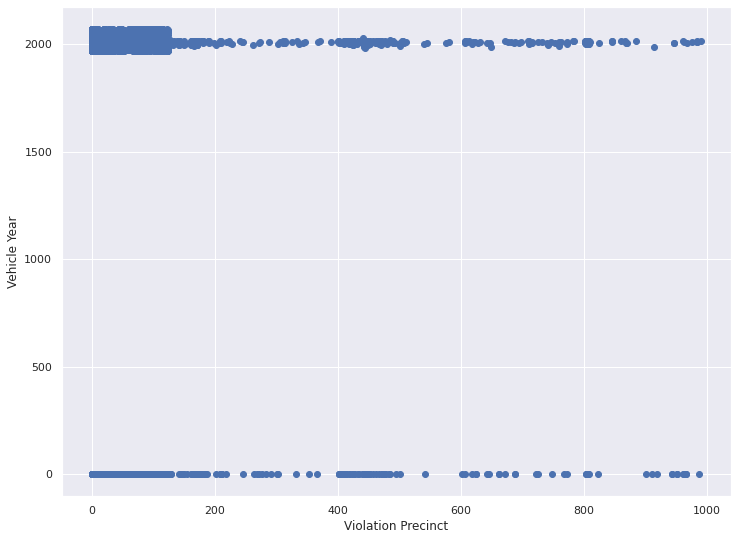

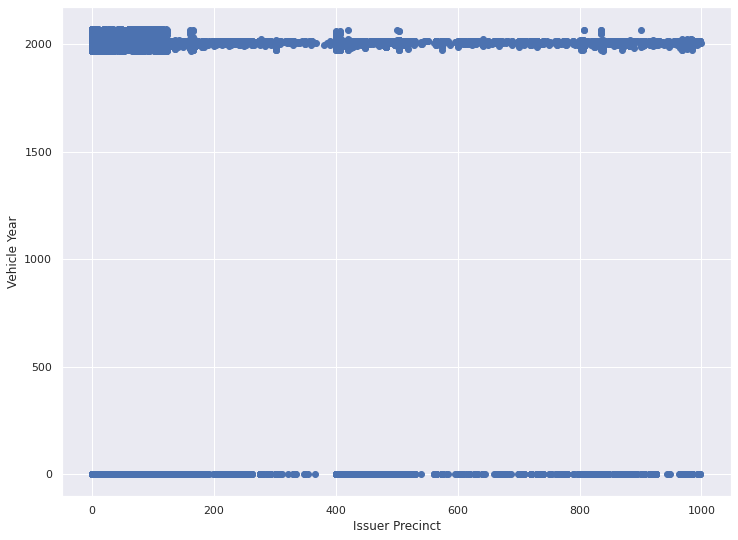

In [34]:
visualize_cols(clean_data_16)

# Standardization

In [14]:
scaler = StandardScaler()
clean_data_16 = scaler.fit_transform(clean_data_16)

### Verifying zero mean and standard deviation of all features

In [24]:
for col in range(clean_data_16.shape[1]):
    print(np.std(clean_data_16[:,col]))
    print(np.mean(clean_data_16[:,col]))
    print("\n\n")

0.9999999999999997
-2.592151895163557e-16



1.0000000000000018
1.9038251459093257e-16



1.0000000000000004
2.3537886740232107e-17



0.9999999999999998
4.3802611316178354e-18





### PCA

In [36]:
pca = PCA()
pca.fit(clean_data_16)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

 - This is the percentage of the variance accounted for by each indivaidual principal component
 - sum of all these values is equal to one i.e. 100%

In [37]:
pca.explained_variance_ratio_

array([0.43456255, 0.32878317, 0.14509204, 0.09156225])

In [38]:
pca.explained_variance_

array([1.73825035, 1.31513279, 0.58036821, 0.36624902])

Text(0, 0.5, 'Cumulative Explained Variance')

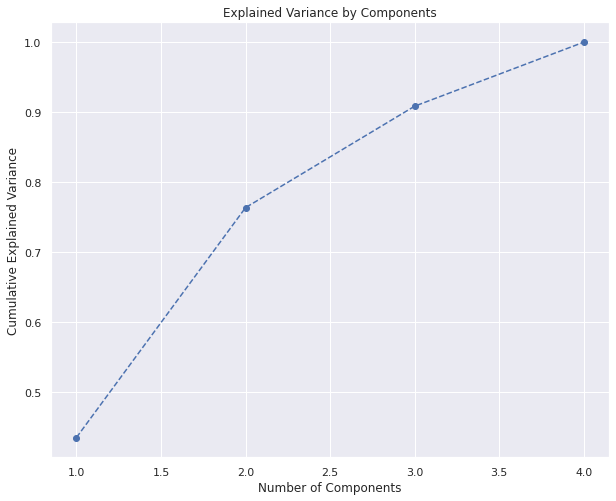

In [39]:
plt.figure(figsize=(10,8))
plt.plot(range(1,5),pca.explained_variance_ratio_.cumsum(),marker='o',linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

 - rule of thumb is to preserve around 80 % of the variance. 
 - No option but to keep 3 components

performing PCA with the chosen number of components

In [15]:
pca = PCA(n_components = 3)

# Fit the model to data with the selected number of components = 3
pca.fit(clean_data_16)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [16]:
# calculating the resulting components scores for the elements in our data set
scores_pca = pca.transform(clean_data_16)
scores_pca

array([[ 2.66059976,  2.23969644,  0.70078266],
       [ 3.30003235,  0.79152593,  2.4477557 ],
       [ 0.06183812, -0.57816208,  1.86248511],
       ...,
       [ 0.42823353, -0.57222993, -1.501755  ],
       [-0.34501669,  0.48467766, -0.19704073],
       [-0.23754619,  0.3374643 , -0.37718006]])

In [17]:
del clean_data_16

In [18]:
scores_pca[0:2000].shape

(2000, 3)

In [19]:
# incorporating the newly obtained PCA scores in the K-means algorithm
# determining the Within Cluster Sum of Squares(WCSS) for each solution by Elbow Method

# We are taking only the first 2000 points as running this through the entre dataset is very expensive

# K means clustering with PCA
# Fitting K Means using transformed data from the PCA
wcss = []
for i in range(1,21):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++',random_state = 42)
    kmeans_pca.fit(scores_pca[0:2000])
    wcss.append(kmeans_pca.inertia_)

determining the number of clusters 
kink or elbow in the WCSS graph is at the 3.125 ~= 3 clusters mark

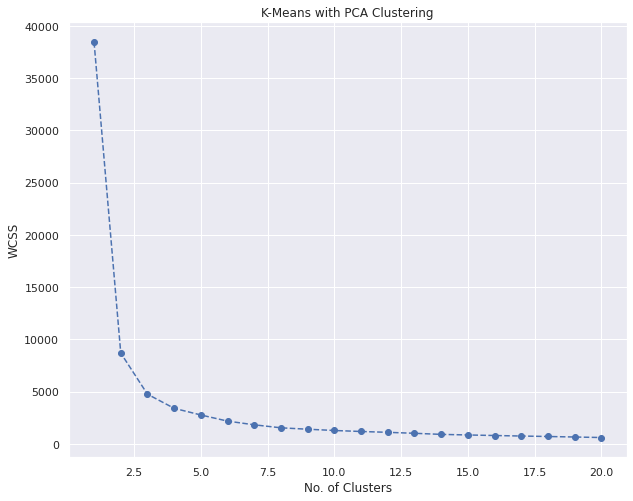

In [20]:
# plotting the WCSS against the number of components on a graph
plt.figure(figsize=(10,8))
plt.plot(range(1,21), wcss, marker='o', linestyle='--')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.title('K-Means with PCA Clustering')
plt.show()

## Implementing KMeans after PCA and using the no. of reqd clusters

In [21]:
kmeans_pca = KMeans(n_clusters=3,init='k-means++',random_state=42)
kmeans_pca.fit(scores_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [22]:
clean_data_16 = pd.read_hdf("./clean_data_16.h5")
clean_data_16 = clean_data_16.dropna()

In [29]:
clean_data_16['Vehicle Expiration Date'] = clean_data_16['Vehicle Expiration Date'].apply(convInt)
clean_data_16 = clean_data_16.astype(convert_dict) 

In [30]:
kmeans_pca_16 = pd.concat([clean_data_16.reset_index(drop=True),pd.DataFrame(scores_pca)],axis=1)

In [31]:
kmeans_pca_16.columns.values[-3:] = ['Component 1','Component 2','Component 3']

In [32]:
# the last column we add contains the pca k-means clutering labels
kmeans_pca_16['Segment K-means PCA'] = kmeans_pca.labels_

In [33]:
kmeans_pca_16.head()

,Vehicle Expiration Date,Violation Precinct,Issuer Precinct,Vehicle Year,Component 1,Component 2,Component 3,Segment K-means PCA
0,153,74,301,2010,2.660600,2.239696,0.700783,0
1,119,79,301,0,3.300032,0.791526,2.447756,0
2,0,79,0,0,0.061838,-0.578162,1.862485,1
3,0,79,301,2015,2.347701,2.812582,1.352292,0
4,37,79,301,2006,2.444711,2.677116,1.199383,0


In [34]:
kmeans_pca_16['Segment'] = kmeans_pca_16['Segment K-means PCA'].map({0:'first',
                                                                     1:'second',
                                                                     2:'third'})

In [36]:
kmeans_pca_16=kmeans_pca_16.drop(columns='Segment K-means PCA')

In [37]:
kmeans_pca_16

,Vehicle Expiration Date,Violation Precinct,Issuer Precinct,Vehicle Year,Component 1,Component 2,Component 3,Segment
0,153,74,301,2010,2.660600,2.239696,0.700783,first
1,119,79,301,0,3.300032,0.791526,2.447756,first
2,0,79,0,0,0.061838,-0.578162,1.862485,second
3,0,79,301,2015,2.347701,2.812582,1.352292,first
4,37,79,301,2006,2.444711,2.677116,1.199383,first
...,...,...,...,...,...,...,...,...
10626893,333,43,43,2013,0.118539,-0.147925,-0.982972,third
10626894,454,43,43,0,1.075313,-2.174319,0.102238,second
10626895,454,43,43,2007,0.428234,-0.572230,-1.501755,first
10626896,151,43,43,2015,-0.345017,0.484678,-0.197041,third


In [38]:
del clean_data_16,kmeans_pca,PCA,pca,reqd_cols,scores_pca

In [39]:
kmeans_pca_16.dtypes

Vehicle Expiration Date      int64
Violation Precinct           int64
Issuer Precinct              int64
Vehicle Year                 int64
Component 1                float64
Component 2                float64
Component 3                float64
Segment                     object
dtype: object

In [40]:
kmeans_pca_16.to_hdf('kmeans_pca_16.h5', key='df', mode='w')

In [2]:
kmeans_pca_16 = pd.read_hdf("./kmeans_pca_16.h5")

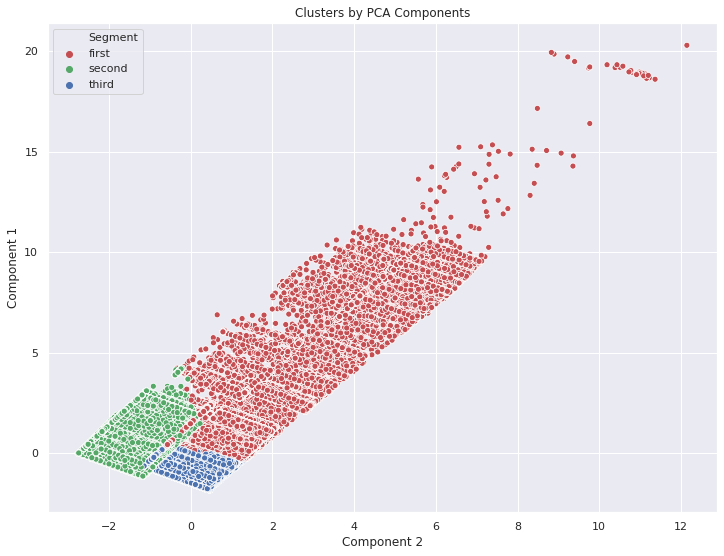

In [3]:
# Visualization
x_axis = kmeans_pca_16['Component 2']
y_axis = kmeans_pca_16['Component 1']
plt.figure(figsize=(12,9))
sns.scatterplot(x_axis,y_axis,hue=kmeans_pca_16['Segment'],palette=['r','g','b'])
plt.title('Clusters by PCA Components')
plt.show()